## Ciudad con mas ventas 


In [60]:

from  random import randint
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np


In [11]:
df2 = pd.read_csv ('Ventas.csv')

In [10]:
df1 = pd.read_csv ('Usuario.csv')

In [24]:
def season (fecha):
    """ 
    El formato para la fecha Año/Mes/Dia
     """
    if (fecha in  pd.date_range(start='01/04/2019', end='30/06/2019')):
        return 'Primavera'
    elif fecha in  pd.date_range(start='01/04/2020', end='30/06/2020'):
        return 'Primavera'
    elif (fecha in  pd.date_range(start='01/07/2019', end='30/09/2019')):
        return 'Verano'
    elif (fecha in  pd.date_range(start='01/07/2020', end='30/09/2020')):
        return 'Verano'
    elif (fecha in  pd.date_range(start='01/10/2019', end='31/12/2019')):
        return 'Otoño'
    elif (fecha in  pd.date_range(start='01/10/2020', end='31/12/2020')):
        return 'Otoño'
    elif (fecha in  pd.date_range(start='01/01/2018', end='31/03/2019')):
        return 'Invierno'
    elif (fecha in  pd.date_range(start='01/12/2019', end='31/03/2020')):
        return 'Invierno'
    else: 
        return 'Fecha incorrecta'

In [26]:
df3 = df2.copy ()

In [27]:
df3

,Usuario,Categorias,Numero_articulos,Fecha,Precio,Valoracion,Comentarios,Proveedores
0,191,Ropa,2,2019-06-24 10:07:19.246642,407.99,2.6,llego justo a tiempo,Levis
1,362,Accesorios,11,2020-06-11 21:21:23.973773,261.75,1.6,el paquete llego en mal estado,Bimba y Lola
2,266,Zapatos,4,2020-01-02 23:52:46.675819,57.55,1.0,no cumple las expectativas,New balance
3,436,Ropa,4,2020-07-28 06:56:23.275207,434.75,3.5,cumple las expectativas,Hollister
4,28,Electronica,5,2020-10-29 04:01:34.449135,54.40,2.1,la calidad no es la esperada,Apple
...,...,...,...,...,...,...,...,...
9995,428,Ferreteria,6,2019-07-09 16:55:22.349744,290.71,0.1,no cumple las expectativas,3M
9996,264,Juguetes,3,2019-12-21 06:54:30.520865,255.27,0.3,no llego el producto,Fisher-price
9997,357,Zapatos,5,2019-05-24 15:18:17.092925,209.56,0.5,no llego el producto,Skechers
9998,381,Electronica,6,2020-05-02 15:26:12.769524,498.60,1.9,el paquete llego en mal estado,General Electric


In [29]:
df3 ['Fecha'] = pd.to_datetime (df3['Fecha'])

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Usuario           10000 non-null  int64         
 1   Categorias        10000 non-null  object        
 2   Numero_articulos  10000 non-null  int64         
 3   Fecha             10000 non-null  datetime64[ns]
 4   Precio            10000 non-null  float64       
 5   Valoracion        10000 non-null  float64       
 6   Comentarios       10000 non-null  object        
 7   Proveedores       10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 625.1+ KB


In [31]:
df3['Fecha'] = df3['Fecha'].dt.strftime("%Y/%m/%d")

In [32]:
df3.head()

,Usuario,Categorias,Numero_articulos,Fecha,Precio,Valoracion,Comentarios,Proveedores
0,191,Ropa,2,2019/06/24,407.99,2.6,llego justo a tiempo,Levis
1,362,Accesorios,11,2020/06/11,261.75,1.6,el paquete llego en mal estado,Bimba y Lola
2,266,Zapatos,4,2020/01/02,57.55,1.0,no cumple las expectativas,New balance
3,436,Ropa,4,2020/07/28,434.75,3.5,cumple las expectativas,Hollister
4,28,Electronica,5,2020/10/29,54.40,2.1,la calidad no es la esperada,Apple


In [33]:
df3['Fecha'] = df3['Fecha'].apply(season)

In [34]:
df3.head()

,Usuario,Categorias,Numero_articulos,Fecha,Precio,Valoracion,Comentarios,Proveedores
0,191,Ropa,2,Primavera,407.99,2.6,llego justo a tiempo,Levis
1,362,Accesorios,11,Primavera,261.75,1.6,el paquete llego en mal estado,Bimba y Lola
2,266,Zapatos,4,Invierno,57.55,1.0,no cumple las expectativas,New balance
3,436,Ropa,4,Verano,434.75,3.5,cumple las expectativas,Hollister
4,28,Electronica,5,Otoño,54.40,2.1,la calidad no es la esperada,Apple


In [35]:
df4 = df1 [['Usuario', 'Ciudad']]

In [38]:
df2_ciuadades = df3.set_index ('Usuario').join(df4.set_index('Usuario'))

In [40]:
df2_ciuadades.reset_index()

,Usuario,Categorias,Numero_articulos,Fecha,Precio,Valoracion,Comentarios,Proveedores,Ciudad
0,1,Cocina,8,Primavera,264.50,1.3,no cumple las expectativas,Flora,Gijón
1,1,Hogar,6,Primavera,431.16,0.9,no cumple las expectativas,Henkel,Gijón
2,1,Cocina,2,Verano,374.87,4.0,justo lo que esperaba,Bimbo,Gijón
3,1,Hogar,2,Primavera,55.15,2.1,el paquete llego en mal estado,Colgate - palmolive,Gijón
4,1,Baño,2,Verano,18.32,4.7,muy bueno!,KH7,Gijón
...,...,...,...,...,...,...,...,...,...
9995,500,Electronica,6,Verano,206.56,4.8,muy bueno!,General Electric,Valencia
9996,500,Electronica,6,Otoño,486.45,1.3,no cumple las expectativas,Samsumg,Valencia
9997,500,Accesorios,10,Primavera,145.73,3.5,cumple las expectativas,Michael Kors,Valencia
9998,500,Zapatos,2,Primavera,463.35,2.6,cumple las expectativas,Skechers,Valencia


In [41]:
df2_ciuadades.to_csv ('DATASET_BASE.csv')

In [42]:
df5 = df2_ciuadades [['Precio', 'Fecha', 'Ciudad']]

In [59]:
df5.head(3)

,Precio,Fecha,Ciudad
Usuario,,,
1,264.50,Primavera,Gijón
1,431.16,Primavera,Gijón
1,374.87,Verano,Gijón


In [46]:
ciudad_con_mas_ventas = df5.groupby (['Ciudad']).sum()

In [48]:
ciudad_con_mas_ventas.sort_values(by='Precio')

,Precio
Ciudad,
Madrid,123553.57
Barcelona,127431.74
Gijón,139555.77
Palma,140960.89
Valladolid,151197.22
Sevilla,168061.28
Bilbao,168721.27
Las Palamas de GC,173771.73
Murcia,175041.87


Text(0, 0.5, 'Ventas acumuladas por ciudad')

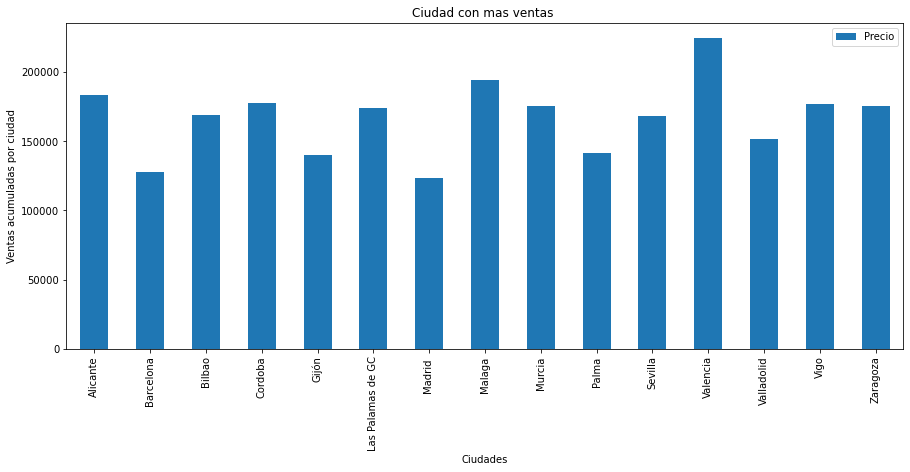

In [58]:
ciudad_con_mas_ventas.plot.bar(figsize = (15,6))
plt.title('Ciudad con mas ventas ')
plt.xlabel('Ciudades')
plt.ylabel('Ventas acumuladas por ciudad')

In [52]:
fecha_con_mas_ventas = df5.groupby (['Fecha']).sum()

In [53]:
fecha_con_mas_ventas.sort_values(by='Precio')

,Precio
Fecha,
Invierno,19519.30
Otoño,619339.79
Verano,634367.94
Primavera,1225532.79


Text(0, 0.5, 'Ventas acumuladas por temporada')

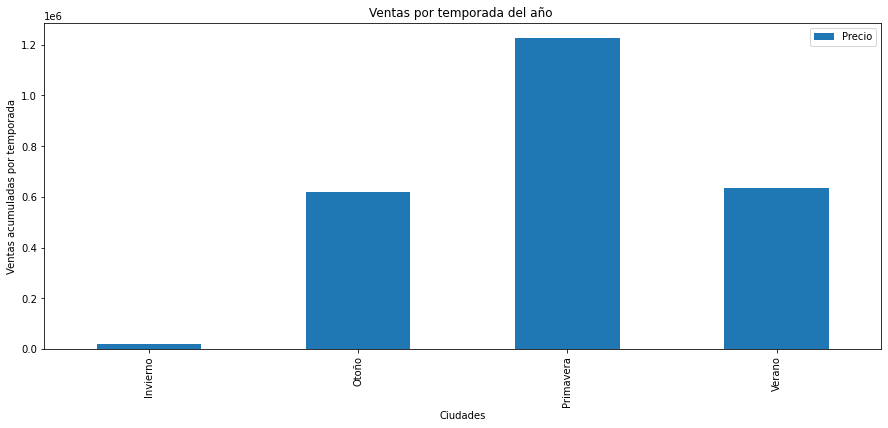

In [66]:
fecha_con_mas_ventas.plot.bar(figsize = (15,6))
plt.title('Ventas por temporada del año ')
plt.xlabel('Ciudades')
plt.ylabel('Ventas acumuladas por temporada')

In [62]:
ventas_temporadas = pd.pivot_table(data=df5, index= ['Ciudad'], values= ['Precio'], columns= 'Fecha', aggfunc=np.sum)

Text(0, 0.5, 'Ventas acumuladas por temporada')

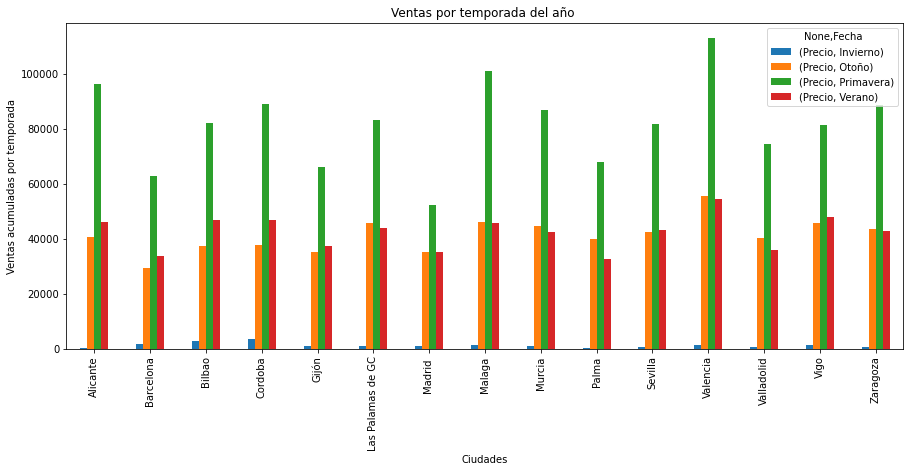

In [68]:
ventas_temporadas.plot.bar(figsize =(15,6))
plt.title('Ventas por temporada del año ')
plt.xlabel('Ciudades')
plt.ylabel('Ventas acumuladas por temporada')

Text(0, 0.5, 'Ventas acumuladas por temporada')

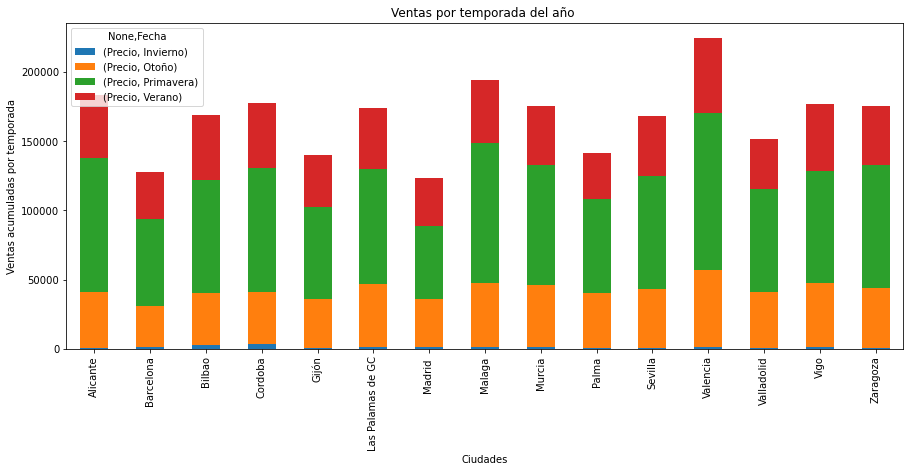

In [69]:
ventas_temporadas.plot.bar(stacked = True, figsize =(15,6))
plt.title('Ventas por temporada del año ')
plt.xlabel('Ciudades')
plt.ylabel('Ventas acumuladas por temporada')